Основные требования к данным при проведении Т-теста:
1) Независимость каждого наблюдения.
2) Гомогенность дисперсий (желательно, но нарушение не критично особенно при равенстве 2-х выборок).
3) Нормальное распределение исследуемого признака в генеральной совокупности.
4) Достаточно большой объем выборки (N > 30), по мнению некоторых обеспечит устойчивость Т-теста к ненормальности распределения.

In [28]:
import scipy.stats as ss
import numpy as np
import seaborn as sns
import pandas as pd

In [44]:
data = np.random.normal(loc = 10, scale = 2, size = 5000)

# Используем тест Шапиро-Уилка для проверки на нормальность
# H0: Выборка извлечена из нормального распределения.
# H1: Выборка извлечена из ненормального распределения.
print(ss.shapiro(data))
"""
Тест Шапиро-Уилка может показать значимые отличия от нормальности, даже если по
факту распределение от нормального не отличается. Такое возможно при очень большом
объёме выборки.
Поэтому, если корреляция на qq-plot превышает 0.95 - это допустимое отклонение
реальных данных от идеальных.
"""

ShapiroResult(statistic=0.9997109174728394, pvalue=0.7392923831939697)


'\nТест Шапиро-Уилка может показать значимые отличия от нормальности, даже если по\nфакту распределение от нормального не отличается. Такое возможно при очень большом\nобъёме выборки.\n'

10000 раз извлечем из нашей выборки по 3 значения, отсортируем их и построим график плотности распределения для минимальных (mins), максимальных (maxes) и средних (averages) значений на каждой итерации.

<AxesSubplot:ylabel='Density'>

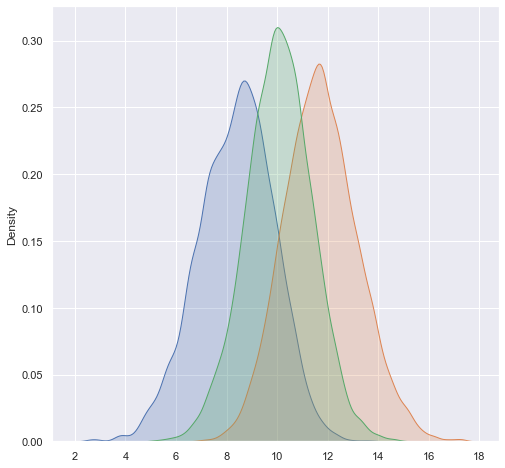

In [43]:
mins = np.array([])
maxes = np.array([])
averages = np.array([])
for i in range(10000):
    tem = np.sort(np.random.choice(data, size=3))
    mins = np.append(mins, tem[0])
    maxes = np.append(maxes, tem[2])
    averages = np.append(averages, tem[1])


sns.set(rc={'figure.figsize':(8, 8)})

sns.kdeplot(mins, shade = True, label="Mins")
sns.kdeplot(maxes, shade = True)
sns.kdeplot(averages, shade = True)

Если бы мы взяли 3 случайных числа и попали бы в вершину каждого из этих графиков, то велика вероятность того, что выборка из 3-х элементов была сделана из нормального распределения.

При построении qq-plot, мы бы посмотрели, где должны были бы оказаться наши 3 значения при ситуации описанной выше.

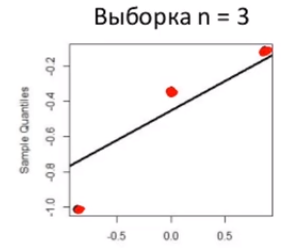

Нормальность выборочных данных может быть важна не так сама по себе, по сравнению с распределением критерия.

Рассмотрим пример, где мы сравниваем средние в 2-х генеральных совокупностях с очевидно ненормальным распределением.

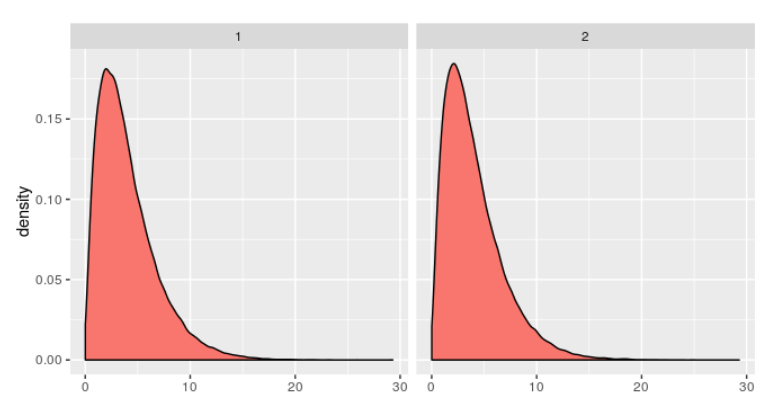

Предположим, что верна нулевая гипотеза и мы многократно извлекаем выборки по 50 наблюдений и сравниваем их между собой при помощи t - теста. 

t = (mu1 - mu2) / (sd1 ** 2 / n1 + sd2 ** 2 / n2) ** 0.5

Несмотря на ненормальное распределение самих выборок, распределение критерия не будет обладать столь же выраженной асимметрией. 

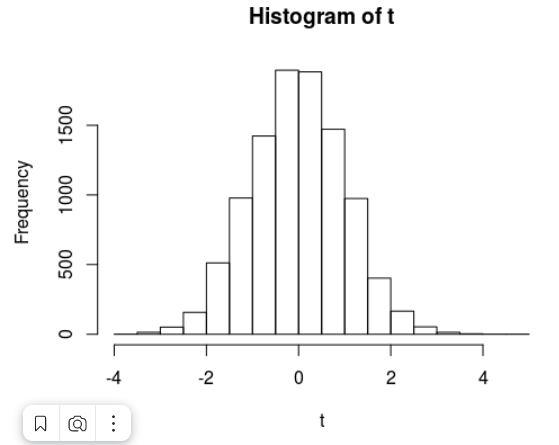

Самым популярным непараметрическим критерием для сравнения двух групп является U-критерий Манна — Уитни. Логика данного критерия заключается в том, что вместо сравнения средних значений в двух выборках критерий сравнивает сумму рангов (не медианы, как многие думают). Мы сначала упорядочиваем все данные, затем рассчитываем сумму рангов в каждой из групп.

Затем для каждой из выборок рассчитывается показатель:

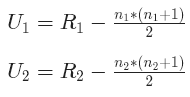

Где R1, R2 - это сумма рангов в 2-х группах, а n1 и n2 - число наблюдений в выборках.

Наименьшее из полученных значений и выступает в качестве статистики теста. Легко показать, что при условии верности нулевой гипотезы распределение этой статистики подчиняется нормальному распределению, где:

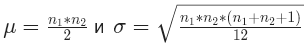

Этот тест неразумно применять при выборках разного размера, с различным направлением асимметрии.

In [45]:
data1 = np.random.normal(loc = 10, scale = 2, size = 1000)
data2 = np.random.normal(loc = 10, scale = 2, size = 1000)
print(ss.mannwhitneyu(data1, data2)) 

MannwhitneyuResult(statistic=508462.0, pvalue=0.5122996121383612)


Непараметрическим аналогом дисперсионного анализа является критерий Краскела-Уоллиса. Основная статистика критерия - это дисперсия средних значений рангов в сравниваемых группах. При верности нулевой гипотезы распределение этой статистики можно описать при помощи распределения Хи-квадрат.

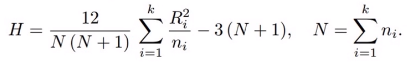

In [48]:
ss.kruskal(data1, data2)

KruskalResult(statistic=0.4294179550224726, pvalue=0.512274687106055)